# Activity Dataset Exploratory Data Analysis

#### Library

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
import pandas as pd

#### Load Helper Functions

In [6]:
%reset -f

import importlib
import activity_functions
importlib.reload(activity_functions)
from activity_functions import *

#### Load Data

In [7]:
activity = load_data()

Loaded from Kaggle: /Users/brookspeterson/.cache/kagglehub/datasets/diegosilvadefrana/fisical-activity-dataset/versions/4/dataset2.csv


#### View Sample Rows

Here we can see a bit of what our data looks like, and the columns and values for each row.

In [8]:
# Option to display all the columns
pd.set_option('display.max_columns', None)
activity.head(5)

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,hand magnetometer Z,chest temperature (°C),chest acceleration X ±16g,chest acceleration Y ±16g,chest acceleration Z ±16g,chest gyroscope X,chest gyroscope Y,chest gyroscope Z,chest magnetometer X,chest magnetometer Y,chest magnetometer Z,ankle temperature (°C),ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,31.8125,0.238080,9.80003,-1.68896,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,30.3125,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,31.8125,0.319530,9.61282,-1.49328,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,30.3125,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,31.8125,0.235593,9.72421,-1.76621,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,30.3125,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,31.8125,0.388697,9.53572,-1.72410,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,30.3125,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,31.8125,0.315800,9.49908,-1.60914,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,30.3125,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


#### Show Info

activityID, our target column is an object, which is good because these are categorical strings. The PeopleId column is integer id values for the people who completed the activities, this is a catagorical column. All other columns are floats.

The only missing values are in the heart_rate column, which is only 46, so these could easily be inputed with median values.

In [9]:
activity.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864056 entries, 0 to 2864055
Data columns (total 33 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   activityID                 2864056 non-null  object 
 1   heart_rate                 2864010 non-null  float64
 2   hand temperature (°C)      2864056 non-null  float64
 3   hand acceleration X ±16g   2864056 non-null  float64
 4   hand acceleration Y ±16g   2864056 non-null  float64
 5   hand acceleration Z ±16g   2864056 non-null  float64
 6   hand gyroscope X           2864056 non-null  float64
 7   hand gyroscope Y           2864056 non-null  float64
 8   hand gyroscope Z           2864056 non-null  float64
 9   hand magnetometer X        2864056 non-null  float64
 10  hand magnetometer Y        2864056 non-null  float64
 11  hand magnetometer Z        2864056 non-null  float64
 12  chest temperature (°C)     2864056 non-null  float64
 13  chest accele

#### Predictor Variable Statistics

In [12]:
# Option to display all the columns
pd.set_option('display.max_columns', None)
activity.describe()

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,hand magnetometer Z,chest temperature (°C),chest acceleration X ±16g,chest acceleration Y ±16g,chest acceleration Z ±16g,chest gyroscope X,chest gyroscope Y,chest gyroscope Z,chest magnetometer X,chest magnetometer Y,chest magnetometer Z,ankle temperature (°C),ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
count,2.864010e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06
mean,1.097703e+02,3.267050e+01,-4.978788e+00,3.575225e+00,3.174904e+00,-3.881062e-03,3.213164e-02,-6.985945e-03,2.125344e+01,-1.432121e+01,-2.161191e+01,3.616121e+01,3.769967e-01,8.510852e+00,-1.511340e+00,5.530288e-03,8.417807e-03,-2.106127e-02,3.548365e+00,-3.186001e+01,5.444112e+00,3.369081e+01,9.547292e+00,-1.251156e-01,-2.459224e+00,8.153172e-03,-3.430653e-02,6.899129e-03,-3.272317e+01,1.635810e+00,1.691927e+01,4.487160e+00
std,2.583130e+01,1.800771e+00,5.989589e+00,6.260608e+00,3.828842e+00,1.298024e+00,8.842820e-01,1.453340e+00,2.402693e+01,2.409430e+01,2.061504e+01,1.573354e+00,1.613453e+00,4.194190e+00,4.172240e+00,3.995758e-01,5.380057e-01,2.915145e-01,1.645963e+01,1.613835e+01,1.990362e+01,1.179777e+00,5.674253e+00,6.816935e+00,3.523211e+00,1.070971e+00,5.953280e-01,1.842663e+00,1.888977e+01,2.159774e+01,2.031745e+01,2.357792e+00
min,5.700000e+01,2.743750e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-2.780440e+01,-2.221270e+01,-1.669970e+01,-1.039410e+02,-2.000430e+02,-4.976320e+02,3.093750e+01,-3.920340e+01,-4.692460e+01,-8.016680e+01,-1.252510e+01,-8.499900e+00,-7.851890e+00,-7.624520e+01,-1.224800e+02,-6.668470e+01,2.912500e+01,-1.550680e+02,-1.574430e+02,-1.589260e+02,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,1.000000e+00
25%,9.000000e+01,3.143750e+01,-9.038570e+00,1.294029e+00,9.735957e-01,-3.477418e-01,-1.970635e-01,-3.028935e-01,5.345607e+00,-2.951722e+01,-3.522090e+01,3.518750e+01,-4.184290e-01,7.312440e+00,-3.873440e+00,-9.108090e-02,-1.261950e-01,-1.121260e-01,-6.811095e+00,-4.022460e+01,-8.380833e+00,3.300000e+01,9.030297e+00,-1.756760e+00,-3.643863e+00,-1.528980e-01,-8.216113e-02,-3.097942e-01,-4.290010e+01,-1.140080e+01,3.293130e+00,2.000000e+00
50%,1.080000e+02,3.312500e+01,-5.818260e+00,3.568640e+00,2.961145e+00,-6.158165e-03,6.137100e-03,-5.385480e-03,2.428385e+01,-1.645440e+01,-2.143940e+01,3.650000e+01,4.477315e-01,9.392730e+00,-1.274260e+00,3.276210e-03,1.051095e-04,-1.628225e-02,2.199270e+00,-3.351180e+01,5.027550e+00,3.400000e+01,9.573050e+00,-2.717770e-01,-2.357330e+00,4.215460e-03,-4.229060e-03,-2.273390e-03,-3.389515e+01,1.419830e+00,1.816660e+01,5.000000e+00
75%,1.250000e+02,3.400000e+01,-8.020333e-01,6.588192e+00,5.996195e+00,3.030542e-01,2.366580e-01,2.924292e-01,3.925000e+01,1.765928e+00,-8.429915e+00,3.750000e+01,1.153480e+00,9.801470e+00,3.972330e-01,9.844330e-02,1.468327e-01,7.106803e-02,1.345140e+01,-2.497750e+01,1.910370e+01,3.456250e+01,1.000520e+01,1.253742e+00,-1.062060e+00,9.399325e-02,8.283495e-02,6.281400e-02,-1.905550e+01,1.734970e+01,3.091070e+01,7.000000e+00
max,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.569490e+02,2.641580e+01,1.698350e+01,1.433840e+01,1.725900e+02,1.211760e+02,1.839110e+02,3.856250e+01,2.752230e+01,1.535820e+02,4.449890e+01,1.851590e+01,6.852570e+00,6.824240e+00,8.047390e+01,4.306130e+01,9.635850e+01,3.543750e+01,1.572320e+02,1.572930e+0

#### Predictor Variable Distribution

There are many predictor variables, but all appear to have a solid spread! Some are heavily concetrated, which demonstrates consistencies across human activity (e.g. the positions of your limbs is commonly neutral across transcient activities)

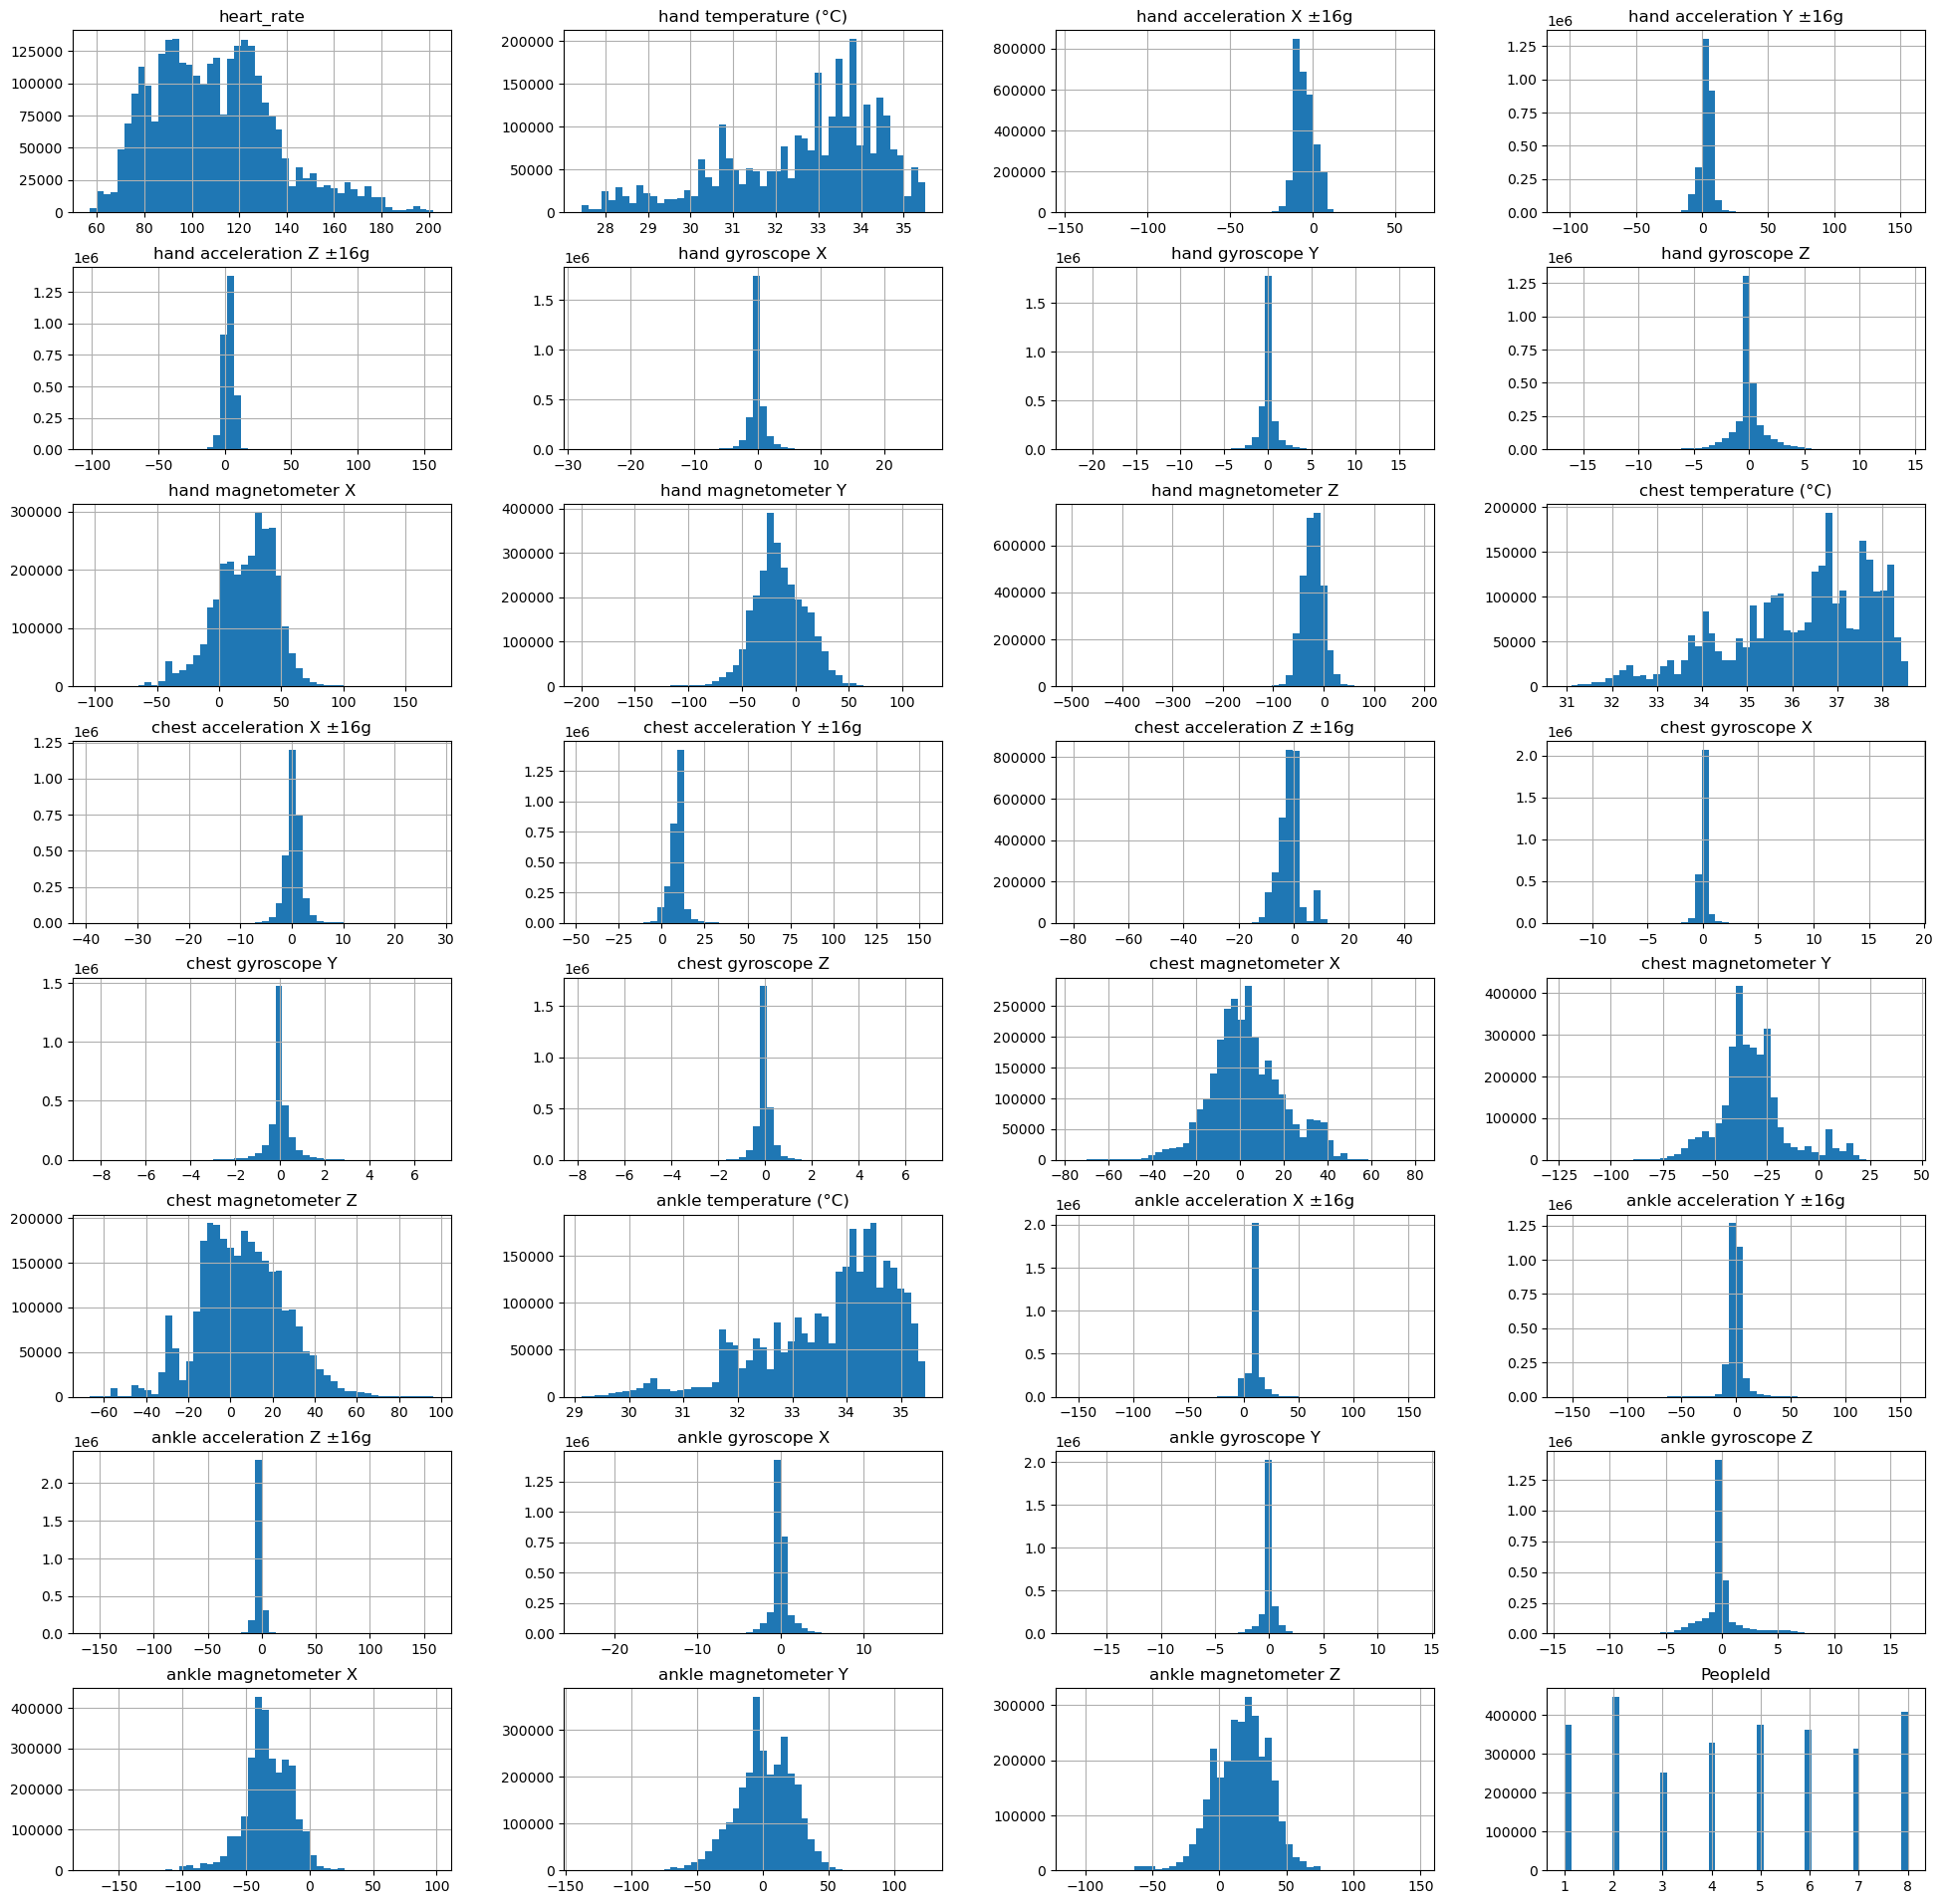

In [15]:
activity.hist(bins=50, figsize=(24, 24), layout=[8, 4])
plt.show()

#### Predictor Variables Correlation

All of our predictor variables seem to be heavily correlated with the target variable activityID, achieving a variety of strong F-values and all very low p-values.

In [16]:
# Temporarily fill null values with simple impution
activity['heart_rate'] = activity['heart_rate'].fillna(activity['heart_rate'].median())

X = activity.drop(columns=['activityID'])
y = activity['activityID']

f_values, p_values = f_classif(X, y)
pd.DataFrame({'Feature': X.columns, 'F_value': f_values, 'p_value': p_values}).sort_values('F_value', ascending=False)

,Feature,F_value,p_value
14,chest acceleration Z ±16g,327229.129223,0.000000e+00
0,heart_rate,324170.059354,0.000000e+00
19,chest magnetometer Y,186674.059198,0.000000e+00
20,chest magnetometer Z,150937.084451,0.000000e+00
1,hand temperature (°C),89846.149382,0.000000e+00
2,hand acceleration X ±16g,86713.145717,0.000000e+00
18,chest magnetometer X,86423.420209,0.000000e+00
13,chest acceleration Y ±16g,75898.744915,0.000000e+00
4,hand acceleration Z ±16g,72249.520195,0.000000e+00
8,hand magnetometer X,69974.770119,0.000000e+00


#### Target Variable Value Counts

In [17]:
activity['activityID'].value_counts()

activityID
transient activities    927575
walking                 238761
ironing                 238690
lying                   192523
standing                189931
Nordic walking          188107
sitting                 185188
vacuum cleaning         175353
cycling                 164600
ascending stairs        117216
descending stairs       104944
running                  98199
rope jumping             42969
Name: count, dtype: int64

#### Categorical Variable Value Counts

These are the value counts for our only categorical variable, PeopleId, which basically tells us how many activities each person did. There is a strong consistency and amount of data with person with Id 2 completing 447,000 activities while person with Id 3 colmpleted 252,833 activities, the least.

In [18]:
activity['PeopleId'].value_counts()

PeopleId
2    447000
8    408031
1    376417
5    374783
6    361817
4    329576
7    313599
3    252833
Name: count, dtype: int64

#### Heart Rate by Activity

This exploratory chart shows the distribution of heart rates per activity. As expected, high intensity activities like rope jumping and running typically correspond to a higher heart rate, while lower intensity activities like lying or sitting typically correspond to a lower heart rate. Transient activities corresponds with a wide range of heart rates due to the variability across people and movements.

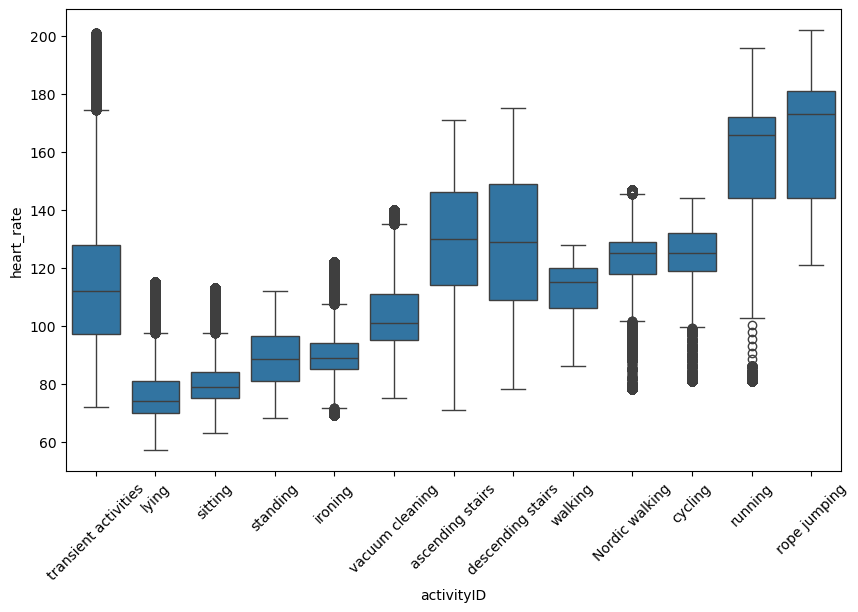

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activityID', y='heart_rate', data=activity)
plt.xticks(rotation=45)
plt.show()

#### Chest Temperature by Activity

Similar to the chart above, it is interesting to note the variance in chest temperatures by activity. For example, jump roping seems to correspond with a lower chest temperature. Maybe this is because your arms and legs are doing a lot of the movement while jump roping and heat is transferred to those areas.

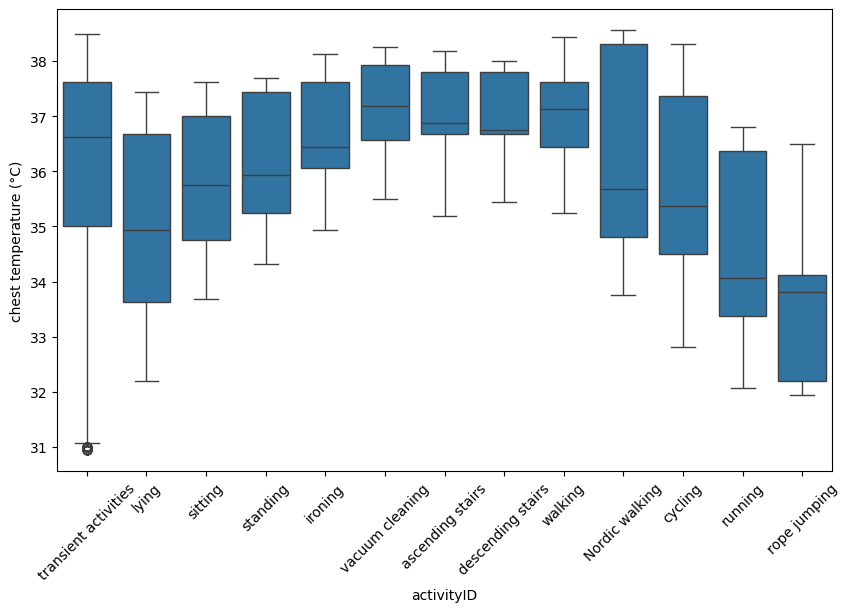

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activityID', y='chest temperature (°C)', data=activity)
plt.xticks(rotation=45)
plt.show()

#### Activity Count by Person

The table and matrix below show the same counts of how much of each activity each person completed. Note how each person completed very different amounts of certain exercises. For example, person 3 completed no running, rope jumping, cycling, or nordic walking. Also note that the most common activity across all people was transient activities, which makes sense with the day-to-day activities of a typical human. 

In [43]:
pd.crosstab(activity['PeopleId'], activity['activityID'])

activityID,Nordic walking,ascending stairs,cycling,descending stairs,ironing,lying,rope jumping,running,sitting,standing,transient activities,vacuum cleaning,walking
PeopleId,,,,,,,,,,,,,
1,20265,15890,23575,14899,23573,27187,12912,21265,23480,21717,126460,22941,22253
2,29739,17342,25108,15213,28880,23430,13262,9238,22345,25576,183651,20683,32533
3,0,10389,0,15275,27975,22044,0,0,28761,20533,78495,20325,29036
4,27533,16694,22699,14285,24995,23047,0,1,25492,24706,98155,20037,31932
5,26271,14281,24577,12727,33034,23699,7733,24646,26864,22132,102341,24445,32033
6,26686,13291,20486,11272,37744,23340,256,22825,23041,24356,111721,21078,25721
7,28725,17646,22680,11618,29499,25611,0,3692,12282,25751,80823,21552,33720
8,28888,11683,25475,9655,32990,24165,8806,16532,22923,25160,145929,24292,31533


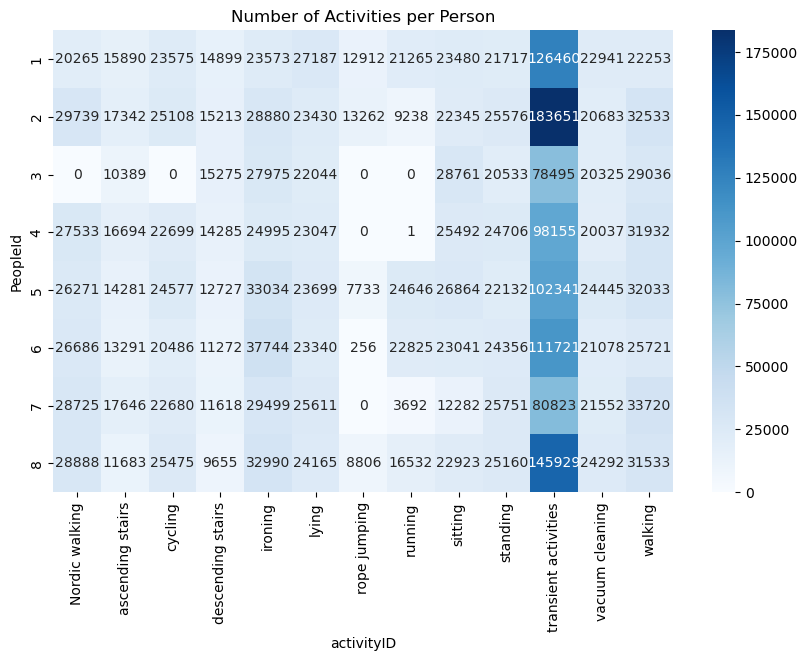

In [21]:
ct = pd.crosstab(activity['PeopleId'], activity['activityID'])

plt.figure(figsize=(10, 6))
sns.heatmap(ct, cmap='Blues', annot=True, fmt='d')
plt.title('Number of Activities per Person')
plt.show()